In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('train_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [54]:
data=data.drop('Loan_ID',axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
data.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

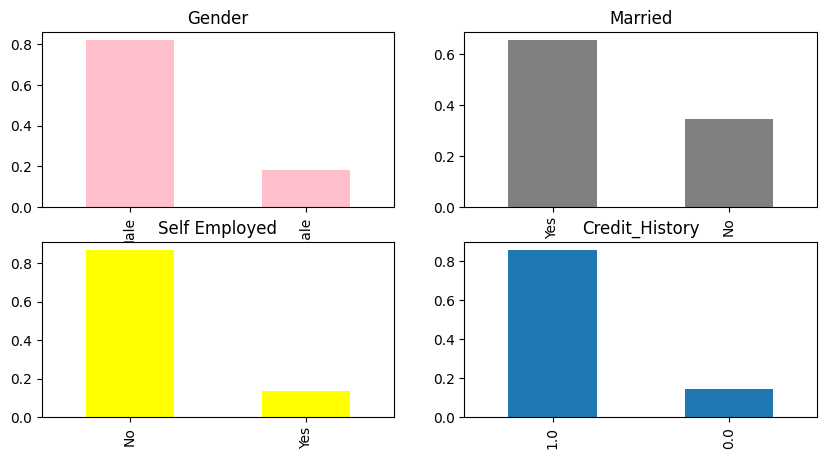

In [58]:
plt.figure(1)
plt.subplot(2,2,1)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender',color='pink')
plt.subplot(2,2,2)
data['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Married',color='grey')
plt.subplot(2,2,3)
data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Self Employed',color='yellow')
plt.subplot(2,2,4)
data['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Credit_History')
plt.show()

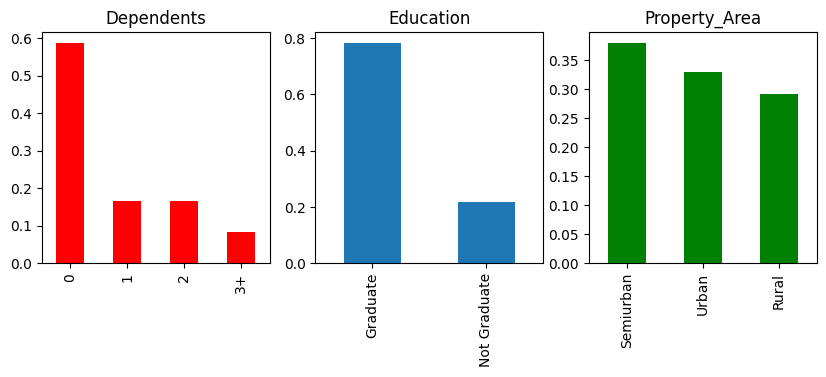

In [59]:
plt.figure(1)
plt.subplot(1,3,1)
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Dependents',color='red')
plt.subplot(1,3,2)
data['Education'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Education')
plt.subplot(1,3,3)
data['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Property_Area',color='green')
plt.show()

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()   # m->1 // f->0

data['Married']= label_encoder.fit_transform(data['Married'])
data['Married'].unique()  # no->0

data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['Self_Employed'].unique()  #no->0

data['Education']= label_encoder.fit_transform(data['Education'])
data['Education'].unique()    #grad->0

data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['Self_Employed'].unique()   #no->0

data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])
data['Property_Area'].unique()    #urban->2 rural->0 semiu->1

data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Dependents'].unique()    #urban->2 rural->0 semiu->1

array([0, 1, 2, 3])

In [61]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,Y
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [62]:
X = data.drop('Loan_Status', axis=1)
Y = data['Loan_Status']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
Y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
predictions= svm_linear.predict(X_test)
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion)

In [ ]:
!pip install joblib


In [ ]:
import joblib
joblib.dump(svm_linear, 'svm_model.pkl')

In [ ]:
loaded_model = joblib.load('svm_model.pkl')


In [ ]:
test_data=pd.read_csv('test_data.csv')

test_data=test_data.drop('Loan_ID',axis=1)


test_data.isnull().sum().sort_values(ascending=False)


test_data = test_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
test_data['Gender']= label_encoder.fit_transform(test_data['Gender'])
test_data['Gender'].unique()   # m->1 // f->0

test_data['Married']= label_encoder.fit_transform(test_data['Married'])
test_data['Married'].unique()  # no->0

test_data['Self_Employed']= label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Self_Employed'].unique()  #no->0

test_data['Education']= label_encoder.fit_transform(test_data['Education'])
test_data['Education'].unique()    #grad->0

test_data['Self_Employed']= label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Self_Employed'].unique()   #no->0

test_data['Property_Area']= label_encoder.fit_transform(test_data['Property_Area'])
test_data['Property_Area'].unique()    #urban->2 rural->0 semiu->1

test_data['Dependents']= label_encoder.fit_transform(test_data['Dependents'])
test_data['Dependents'].unique()    #urban->2 rural->0 semiu->1


test_data.head()

In [ ]:
predict = loaded_model.predict(test_data)
print(predict)

In [ ]:
test_data['Predicted_Label'] = predict

In [ ]:
test_data.head()

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('train_data.csv')
print(df.describe())
print("Shape of data: ", df.shape)

In [ ]:
df=df.drop('Loan_ID',axis=1)
df.isnull().sum().sort_values(ascending=False)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'crest',)

In [ ]:
df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['Married'])
df = pd.get_dummies(df, columns=['Self_Employed'])
df = pd.get_dummies(df, columns=['Education'])
df = pd.get_dummies(df, columns=['Property_Area'])
df = pd.get_dummies(df, columns=['Dependents'])

In [ ]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']
print("Shape of X: ", X.shape)
print("Shape of Y: ", Y.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=11, criterion='entropy')
clf.fit(X_train, Y_train)

In [ ]:
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
print("Test Accuracy: ", accuracy_score(Y_test, Y_pred_test))
print("trani Accuracy: ", accuracy_score(Y_train, Y_pred_train))

In [ ]:
import joblib
joblib.dump(clf, 'clf.pkl')

In [ ]:
loaded_model = joblib.load('clf.pkl')

In [ ]:
test_data=pd.read_csv('test_data.csv')

test_data=test_data.drop('Loan_ID',axis=1)


test_data.isnull().sum().sort_values(ascending=False)


test_data = test_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

test_data = pd.get_dummies(test_data, columns=['Gender'])
test_data = pd.get_dummies(test_data, columns=['Married'])
test_data = pd.get_dummies(test_data, columns=['Self_Employed'])
test_data = pd.get_dummies(test_data, columns=['Education'])
test_data = pd.get_dummies(test_data, columns=['Property_Area'])
test_data = pd.get_dummies(test_data, columns=['Dependents'])

In [ ]:
predict = loaded_model.predict(test_data)
test_data['Predicted_Label'] = predict

In [ ]:
test_data.head()